Sejal Sanas

# Task - 1: Music Recommendation system


**Description:** Spotify's recommendation system, powered by machine learning, predicts a user's likelihood of repeatedly listening to a song within a set timeframe. Using a dataset with 1 indicating repeated plays within a month, it tracks user song histories and timestamps to generate personalized song recommendations.

**Dataset:** https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset/data

# Importing the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing the Datasets

In [2]:
data = pd.read_csv('C:/Users/Shejal Sanas/Downloads/archive (4)/data/data.csv')
genre_data = pd.read_csv('C:/Users/Shejal Sanas/Downloads/archive (4)/data/data_by_genres.csv')
year_data = pd.read_csv('C:/Users/Shejal Sanas/Downloads/archive (4)/data/data_by_year.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [4]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [5]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


# Correlation Between Features and the Target Variable

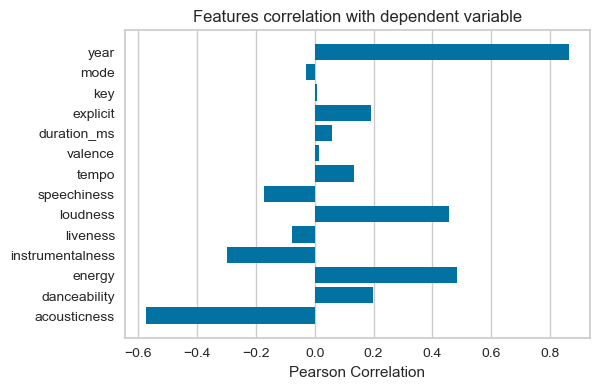

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [8]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']
x, y = data[feature_names], data['popularity']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)
plt.rcParams['figure.figsize']=(6,4)
visualizer.fit(x, y)
visualizer.show()

In [7]:
!pip install yellowbrick


  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   -------- ------------------------------- 61.4/282.6 kB 1.7 MB/s eta 0:00:01
   ----------------- ---------------------- 122.9/282.6 kB 1.8 MB/s eta 0:00:01
   ----------------- ---------------------- 122.9/282.6 kB 1.8 MB/s eta 0:00:01
   ----------------------- ---------------- 163.8/282.6 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 163.8/282.6 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 163.8/282.6 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 163.8/282.6 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 163.8/282.6 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 163.8/282.6 kB 1.1 MB/s eta 0:00:01
   --

# Correlation Matrix Heatmap

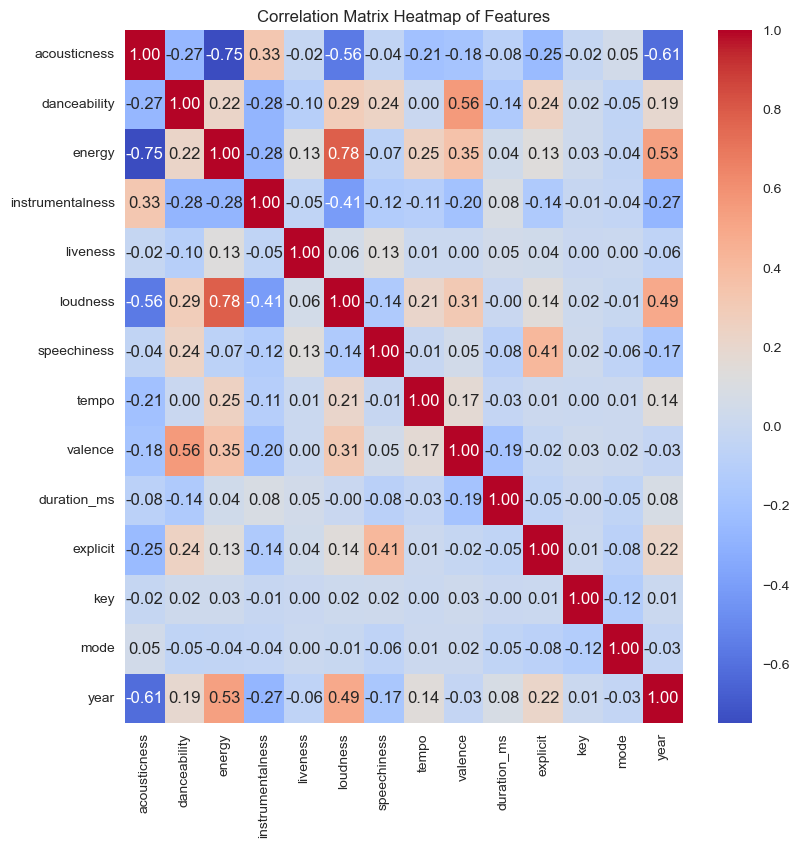

In [9]:
plt.figure(figsize=(9, 9))
sns.heatmap(data[feature_names].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Features')
plt.show()

# EDA & Visualization

Music Over Time/Songs per Decade

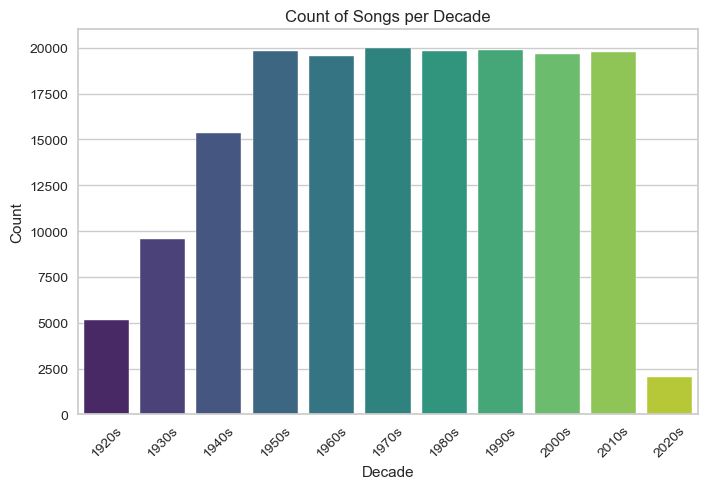

In [10]:
def get_decade(year):
    period_start = int(year / 10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='decade', palette='viridis')
plt.title('Count of Songs per Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Top Music Trends Over Time

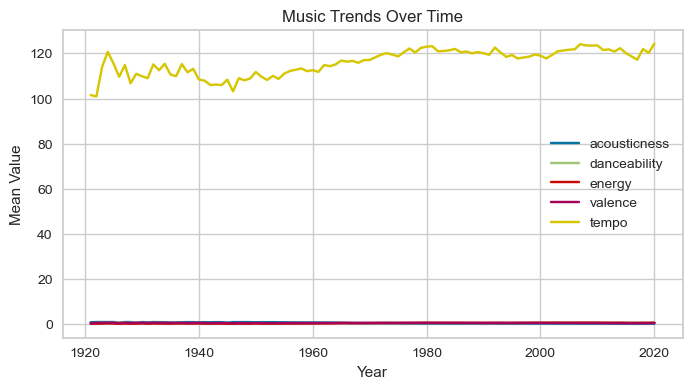

In [11]:
mean_features_by_year = data.groupby('year').mean()
features_to_analyze = ['acousticness', 'danceability', 'energy', 'valence', 'tempo']

plt.figure(figsize=(8, 4))
for feature in features_to_analyze:
    plt.plot(mean_features_by_year.index, mean_features_by_year[feature], label=feature)

plt.title('Music Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()

Top Genres Over Time

In [13]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

Characteristics of Different Genres

In [14]:
top10_genres = genre_data.nlargest(10, 'popularity')
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

# Implementing K-Means Clustring Algorithm

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [16]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms',
            'key', 'mode']

# Concatenating the datasets
X = pd.concat([data[features], genre_data[features], year_data[features]])

In [17]:
# K-means clustering pipeline
kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=10, random_state=42))
])

In [18]:
# Fit K-means clustering model
kmeans_pipeline.fit(X)

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=10, random_state=42))])

In [19]:
# Adding cluster labels to the datasets
data['cluster_label'] = kmeans_pipeline.predict(data[features])
genre_data['cluster_label'] = kmeans_pipeline.predict(genre_data[features])
year_data['cluster_label'] = kmeans_pipeline.predict(year_data[features])

# Building the Recommendation System

Based on users song style & mood

In [20]:
def recommend_songs(user_song, dataset):
    user_cluster = kmeans_pipeline.predict(user_song)[0]
    recommended_songs = dataset[dataset['cluster_label'] == user_cluster].sample(5)
    return recommended_songs[['name', 'artists']]

In [21]:
# Example Usage
user_song = pd.DataFrame({
    'valence': [0.6], 'acousticness': [0.2], 'danceability': [0.7],
    'energy': [0.8], 'instrumentalness': [0.1], 'loudness': [-5],
    'speechiness': [0.3], 'tempo': [120], 'liveness': [0.5],
    'duration_ms': [250000], 'key': [0], 'mode': [1]
})
recommendations = recommend_songs(user_song[features], data)
print("Recommended Songs:")
recommendations

Recommended Songs:


,name,artists
18936,Spirits,['The Strumbellas']
47729,Salvation,['Elton John']
159237,Don't Ask Me What I Say,['Manfred Mann']
12092,The Girl Is Mine (with Paul McCartney),"['Michael Jackson', 'Paul McCartney']"
100514,The Flesh Failures (Let the Sunshine In),"['Galt MacDermot', 'Tom Pierson']"


# Plots of the Recommended Songs & Artists

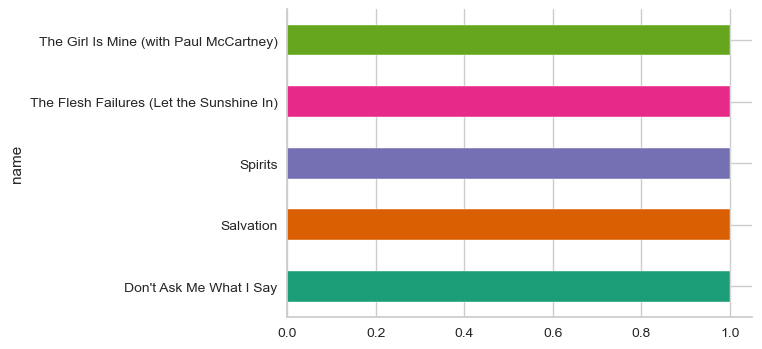

In [22]:
# @title name

from matplotlib import pyplot as plt
import seaborn as sns
recommendations.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

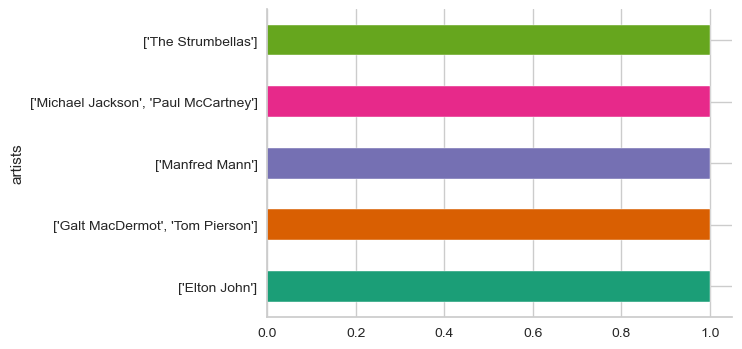

In [23]:
# @title artists

from matplotlib import pyplot as plt
import seaborn as sns
recommendations.groupby('artists').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Conclusion

1. **Song Profile Creation**: A profile for a single song, `user_song`, is created, including characteristics like energy and danceability.

2. **Comparing with Existing Songs**: `user_song`'s features are compared with thousands of other songs in the dataset (`data`).

3. **Finding Similar Songs**: Songs in the dataset with similar features to `user_song` are considered recommendations.

4. **Presenting Recommendations**: These recommended songs are listed, suggesting ones that match the user's song style and mood.


The implemented music recommendation system offers a straightforward approach to suggest songs based on their attributes. It highlights the feasibility of leveraging machine learning for personalized recommendations.